# scikit-learn-基本功能

## 教學目標

這份教學的目標是介紹基本的 `scikit-learn` 功能，並學習撰寫機器學習的程式碼。

## 適用對象

適用於有程式基礎，且擁有 python、`numpy`、`pandas` 與 `matplotlib` 基礎的學生。

若沒有先學過 python，請參考 [python-入門語法](./python-入門語法.ipynb) 教學。

若沒有先學過 `numpy`，請參考 [numpy-基本功能](./numpy-基本功能.ipynb) 教學。

若沒有先學過 `pandas`，請參考 [pandas-基本功能](./pandas-基本功能.ipynb) 教學。

若沒有先學過 `matplotlib`，請參考 [matplotlib-資料視覺化](./matplotlib-資料視覺化.ipynb) 教學。

## 執行時間

本教學全部執行時間約為 2.0011203289031982 秒。

|測試環境|名稱|
|-|-|
|主機板|X570 AORUS ELITE|
|處理器|AMD Ryzen 7 3700X 8-Core Processor|
|記憶體|Kingston KHX3200C16D4/16GX|
|硬碟|Seagate ST1000DM003-1ER1|
|顯示卡|GeForce RTX 2080|
|作業系統|Ubuntu 18.04 LTS|

## 大綱

- [簡介](#簡介)
- [安裝](#安裝)
- [機器學習流程](#機器學習流程)
- [資料前處理](#資料前處理)
- [機器學習模型](#機器學習模型)
- [模型驗證](#模型驗證)
- [評估方法](#評估方法)
- [練習](#練習)

## 簡介

`scikit-learn` 是以 python 為介面的**機器學習函式庫**，提供種類豐富的**機器學習模型**與**分析工具**，能夠套用在各式各樣的資料集上。

根據 [scikit-learn 官方網站](https://scikit-learn.org/stable/)（v0.22）：

> Simple and efficient tools for predictive data analysis
> 
> 簡單且有效率的預測型資料分析工具
> 
> Accessible to everybody, and reusable in various contexts
>
> 容易取得，能夠在不同的環境下重複利用執行結果
>
> Built on NumPy, SciPy, and matplotlib
>
> 基於 `numpy`、`scipy` 與 `matplotlib` 等工具進行開發
>
> Open source, commercially usable - BSD license
>
> 以 BSD 授權條款開源且可以進行商業使用

## 安裝

透過 `pip` 安裝 `scikit-learn`：

```sh
pip install scikit-learn
```

In [1]:
# 匯入 scikit-learn 模組
# 在 python 中的介面名稱為 sklearn

import sklearn

# 處理資料時會用到的工具

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 儲存模型的工具
import pickle

## 機器學習流程

機器學習基本上分成以下流程：

1. **訓練**模型
2. **驗證**與**測試**模型
3. 轉換為**應用**程式

### 訓練模型（Training）

1. 給予訓練資料
2. 資料前處理
3. 選擇機器學習模型
4. 設定模型參數
5. 使用 `model.fit()` 進行模型訓練
6. 確認模型是否訓練成功
7. 保存訓練後的模型

### 驗證與測試（Validation & Test）

1. 給予驗證/測試資料
2. 資料前處理
3. 載入訓練過的模型
4. 使用 `model.predict()` 進行預測
5. 評估預測結果

### 應用（Deploy）

1. 串接資料流（包含前處理）
2. 決定是否動態載入模型
3. 預測輸入資料
4. 轉換預測結果成為可解讀的資訊

1.0


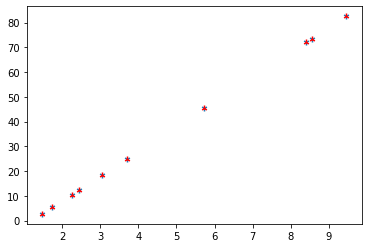

In [2]:
# 訓練模型

# 1. 給予訓練資料
# 此範例中我們要學習的目標是 y = 10x - 12
train_x = np.random.rand(10, 1) * 10
train_y = 10 * train_x - 12

# 2. 資料前處理
# 此範例中不需要進行前處理

# 3. 選擇機器學習模型
# 此範例中我們選擇 Linear Regression 模型
from sklearn.linear_model import LinearRegression

# 4. 設定模型參數
# 此範例中我們參考 Linear Regression 預設值
model = LinearRegression(fit_intercept=True, # 將 fit-intercept 設為 True
                         normalize=False)    # 將 normalize 設為 False

# 5. 使用 model.fit 進行模型訓練
# 模型輸入為 train_x，預測目標為 train_y
model.fit(train_x, train_y)

# 6. 確認模型是否訓練成功
# 此範例中使用 model.score 與視覺化的方式觀察
print(model.score(train_x, train_y))
plt.scatter(train_x,
            train_y,
            marker='1')
plt.scatter(train_x,
            model.predict(train_x),
            marker='2',
            color='red')
plt.show()

# 7. 保存訓練後的模型
# 使用 pickle 將模型儲存於 ./data/model.pickle
pickle.dump(model, open('./data/model.pickle', 'wb'))

1.0


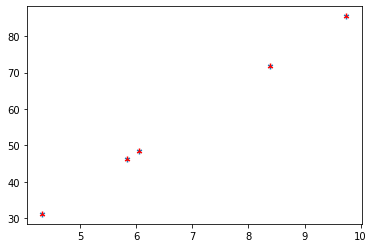

In [3]:
# 驗證與測試

# 1. 給予驗證/測試資料
# 此範例中我們要測試模型是否學到 y = 10x - 12
test_x = np.random.rand(5, 1) * 10
test_y = 10 * test_x - 12

# 2. 資料前處理
# 此範例中不需要進行前處理

# 3. 載入訓練過的模型
# 使用 pickle 將儲存於 ./data/model.pickle 的模型讀入
model = pickle.load(open('./data/model.pickle', 'rb'))

# 4. 使用 `model.predict()` 進行預測
# 模型輸入為 test_x，將預測結果保留在 pred_y
pred_y = model.predict(test_x)

# 5. 評估預測結果
# 此範例中使用 model.score 與視覺化的方式觀察
print(model.score(test_x, test_y))
plt.scatter(test_x,
            test_y,
            marker='1')
plt.scatter(test_x,
            pred_y,
            marker='2',
            color='red')
plt.show()

In [4]:
# 應用

# 1. 串接資料流（包含前處理）
# 此範例中將流程改為可以只處理一筆資料
def stream_data(model, x):
    y = model.predict([[x]])
    return y[0, 0]

# 2. 決定是否動態載入模型
# 此範例中不使用動態載入模型，所有程式共享一份記憶體
model = pickle.load(open('./data/model.pickle', 'rb'))

# 3. 預測輸入資料
# 使用事先載入記憶體中的模型 model 預測單一輸入 x
# 將預測結果保留在 output_y
input_x = 1
output_y = stream_data(model, input_x)

# 4. 轉換預測結果成為可解讀的資訊
# 單純將輸入與預測結果結合後輸出
print('input {} will get {}'.format(input_x, output_y))

input 1 will get -2.000000000000007


## 資料前處理

讀取資料集後並對資料進行前處理，包含：

- 處理**不存在**或是**遺失**的值
- 去除**離群值（Outlier）**
- **取出**需要分析的資料欄位
- 針對**不同資料型態**進行特別處理，通常分為兩種型態：
    - **數值**型態
    - **類別**型態

### 資料集

本教學使用 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) 所提供的資料，根據鐵達尼號乘客資料**預測生還者**。

點選[資料集分頁](https://www.kaggle.com/c/titanic/data)後，點擊 `Download All` 下載所有資料並解壓縮，或是只下載 `train.csv`, `test.csv`。

將下載後的資料放入 `course_material/data` 資料夾中，將 `train.csv` 與 `test.csv` 分別重新命名為 `titanic_train.csv` 與 `titanic_test.csv`。

### 填補缺失值

使用 `sklearn.impute.SimpleImputer` 進行**填補缺失**的動作，策略包含：

|策略|意義|
|-|-|
|`strategy=mean`|使用平均數填補缺失值|
|`strategy=median`|使用中位數填補缺失值|
|`strategy=most_frequent`|使用眾數填補缺失值|
|`strategy=costant`|使用常數填補缺失值，必須使用 `fill_value=constant` 設定填補常數|

範例程式碼：

```python
from sklearn.impute import SimpleImputer # 匯入填補缺失值的工具

imputer = SimpleImputer(strategy='mean') # 創造 imputer 並設定填補策略
imputer.fit(values)                      # 根據資料學習需要填補的值
values = imputer.transform(values)       # 填補缺失值
```

更多填補缺失值的工具請參考 [`sklearn.impute`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)。

### 數值資料（Numerical Data）

若資料型態為**數值**，且包含**範圍**很大（例如最小值與最大值差超過 $10^2$），則可以考慮以下作法：

#### 標準化（Normalization）

![Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/680px-Normal_Distribution_PDF.svg.png)

將數值縮小到**方便計算**的範圍，例如 $[0, 1]$ 之間；常見作法為 $\frac{x - \mu}{\sigma}$

- $x$ 為每一筆資料
- $\mu$ 為所有資料的平均值
- $\sigma$ 為所有資料的標準差

範例程式碼：

```python
from sklearn.preprocessing import StandardScaler # 匯入標準化的工具

normalizer = StandardScaler()                    # 創造標準化工具
normalizer.fit(values)                           # 根據資料學習平均值與標準差
values = normalizer.transform(values)            # 進行標準化
```

其他標準化的作法可參考[維基百科 Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics))。

#### 轉換數值空間（Domain Transformation）

![Domain Transformation](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/650px-Population_vs_area.svg.png)

將數值轉換到**不同的空間**；常見作法為取 $\log(x)$。

- $x$ 為每一筆資料
- 數值必須為正數

範例程式碼：

```python
import numpy as np
from sklearn.preprocessing import FunctionTransformer # 匯入轉換數值的工具

transformer = FunctionTransformer(np.log)             # 創造轉換數值工具
values = transformer.transform(values)                # 進行轉換數值
```

其他轉換數值的作法可參考[維基百科 Data Transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics))。

#### 去除離群值（Remove Outlier）

![Quartile](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/440px-Boxplot_vs_PDF.svg.png)

**丟棄不合理**的資料；常見作法為只保留 $x \in [Q_1 - 1.5(Q_3 - Q_1), Q_3 + 1.5(Q_3 - Q_1)]$

- $x$ 為每一筆資料
- $Q_1$ 代表第一四分位距
- $Q_3$ 代表第一四分位距

範例程式碼：

```python
import numpy as np

q1, q3 = np.quantile(values, [0.25, 0.75])          # 計算第一與第三四分位數
low = q1 - 1.5 * (q3 - q1)                          # 計算下界
high = q3 + 1.5 * (q3 - q1)                         # 計算上界
values = values[(values >= low) & (values <= high)] # 濾除離群值
```

其他計算離群值的作法可參考[維基百科 Outlier](https://en.wikipedia.org/wiki/Outlier)。

更多數值型態資料前處理的工具請參考 [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)。

### 類別資料（Categorical Data）

若資料型態為**類別**，則可以考慮以下作法：

#### Label Encoding

給予每個類別 $c$ 一個**對應的數字** $n_c$，之後都**以相同的數字代表該類別**：
而數字 $n_c$ 必須符合以下規則：

$$
\begin{align*}
& n_c \in \{1, \dots, c\} \\
& n_{c_1} \neq n_{c_2} \text{ if } c_1 \neq c_2
\end{align*}
$$

- 優點：使用數字**方便計算**
- 缺點：數字本身包含**距離關係**

範例程式碼：

```python
from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder

le = LabelEncoder()                            # 創造 Label Encoder
le.fit(values)                                 # 給予每個類別一個數值
values = le.transform(values)                  # 轉換所有類別成為數值
```

#### One-hot Vector

給予每個類別 $c$ 一個**對應的向量** $v_c$，之後都**以相同的向量代表該類別**。
而向量 $v_c$ 必須符合以下規則：

$$
\begin{align*}
& v_c =
\begin{pmatrix}
0 \\
\vdots \\
0 \\
1 \\
0 \\
\vdots \\
0
\end{pmatrix}
\in \mathbb{R}^c \\
& v_c[i] =
\begin{cases}
0 & \text{if } i \neq c \\
1 & \text{if } i = c
\end{cases} \\
& v_{c_1} \neq v_{c_2} \text{ if } c_1 \neq c_2
\end{align*}
$$

- 優點：類別與類別之間彼此**沒有關係**
- 缺點：需要**較多的記憶體**空間紀錄類別資訊

範例程式碼：

```python
from sklearn.preprocessing import OneHotEncoder # 匯入 One-hot Encoder

ohe = OneHotEncoder()                           # 創造 One-hot Encoder
ohe.fit(values)                                 # 給予每個類別一個 One-hot Vector
values = ohe.transform(values)                  # 轉換所有類別成為 One-hot Vector
```

更多類別型態資料前處理的工具請參考 [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)。

In [5]:
# 資料集

train_df = pd.read_csv('./data/titanic_train.csv') # 讀取訓練資料
train_df.head(5)                                   # 預覽訓練資料前 5 筆

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info() # 輸出訓練資料型態與大小

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe() # 輸出訓練資料統計資訊

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_x = train_df[['Sex', 'Age']] # 取出訓練資料需要分析的資料欄位
train_y = train_df['Survived']     # 取出訓練資料的答案

In [9]:
# 數值型態資料前處理

from sklearn.impute import SimpleImputer       # 匯入填補缺失值的工具

imputer = SimpleImputer(strategy='median')     # 創造 imputer 並設定填補策略
age = train_x['Age'].to_numpy().reshape(-1, 1)
imputer.fit(age)                               # 根據資料學習需要填補的值
train_x['Age'] = imputer.transform(age)        # 填補缺失值

train_x.tail(5)                                # 顯示填補後的資料

,Sex,Age
886,male,27.0
887,female,19.0
888,female,28.0
889,male,26.0
890,male,32.0


In [10]:
# 類別型態資料前處理

from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder

le = LabelEncoder()                            # 創造 Label Encoder
le.fit(train_x['Sex'])                         # 給予每個類別一個數值
train_x['Sex'] = le.transform(train_x['Sex'])  # 轉換所有類別成為數值

train_x.head(5)                                # 顯示轉換後的資料

,Sex,Age
0,1,22.0
1,0,38.0
2,0,26.0
3,0,35.0
4,1,35.0


## 機器學習模型

在選擇機器學習模型時需要考慮以下條件：

- 任務**類型**
- 是否擁有**標記資料**
- 擁有標記資料的**數量**

### 任務類型

機器學習任務類型主要分為兩種：

#### 數值預測

![Linear Regression](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)

若給予一筆資料 $x$，希望能夠讓機器學習模型自動輸出對應的**數值** $y$，則我們稱任務「用 $x$ 預測**數值** $y$」為**迴歸分析（Regression）**。

令訓練資料集 $D = \{(x_1, y_1), \dots, (x_n, y_n)\}$。
若迴歸模型為 $f$，參數為 $\theta$，則目標是根據訓練資料 $D$ 找出表現最好的參數 $\theta_*$ 並且滿足以下需求：

$$
\begin{align*}
\theta_* &= \arg\min_{\theta} \mathcal{L} \big( f(x_1; \theta), y_1 \big) + \mathcal{L} \big( f(x_2; \theta), y_2 \big) + \dots + \mathcal{L} \big( f(x_n; \theta), y_n \big) \\
&= \arg\min_{\theta} \sum_{i = 1}^n \mathcal{L} \big( f(x_i; \theta), y_i \big) \\
&= \arg\min_{\theta} \frac{1}{n} \sum_{i = 1}^n \mathcal{L} \big( f(x_i; \theta), y_i \big) \\
&= \arg\min_{\theta} \frac{1}{n} \sum_{i = 1}^n \big( f(x_i; \theta) - y_i \big)^2
\end{align*}
$$

- 模型**輸出**可以是**任意數字**
    - 模型 $f$ 在樣本 $x_i$ 得到的輸出為 $f(x_i) \in \mathbb{R}$
    - 樣本 $x_i$ 真正對應到的答案為 $y_i \in \mathbb{R}$
- 目標函數 $\mathcal{L}$ 稱為**最小平方差（Mean Square Error，MSE）**
    - 訓練資料中的每一個樣本都會用於訓練，所以使用 $\sum_{i = 1}^n$ 將所有樣本誤差結合
    - 不論誤差是正數還是負數都是誤差，但正負誤差值直接相加會互相抵消，所以需要取平方
    - 誤差值會透過 $\sum_{i = 1}^n$ 累加，導致樣本數愈多誤差愈大，所以使用 $\frac{1}{n}$ 抵消樣本數的影響
    - 使用不同的模型參數 $\theta$ 會影響目標函數 $\mathcal{L}$，所以使用 $\arg\min_{\theta}$ 找出 $\min_{\theta} \frac{1}{n} \sum_{i = 1}^n \mathcal{L} \big( f(x_i; \theta), y_i \big)$（即誤差最少）的參數 $\theta_*$
- 目標函數 $\mathcal{L}$ 可以替換成其他作法
    - L2 norm：$\frac{1}{n} \sum_{i = 1}^n \sqrt{\left(f(x_i; \theta) - y_i\right)^2}$
    - 絕對值：$\frac{1}{n} \sum_{i = 1}^n \left|f(x_i; \theta) - y_i\right|$
- 更多資訊可以參考以下連結
    - [迴歸分析](https://zh.wikipedia.org/zh-tw/%E8%BF%B4%E6%AD%B8%E5%88%86%E6%9E%90)
    - [最小平方法](https://zh.wikipedia.org/zh-tw/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95)

#### 類別預測

![Classification](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/640px-Kernel_Machine.svg.png?1586847480231)

若給予一筆資料 $x$，希望能夠讓機器學習模型自動輸出對應的**類別** $y$，則我們稱任務「用 $x$ 預測**類別** $y$」為**分類問題（Classification）**。

令訓練資料集 $D = \{(x_1, y_1), \dots, (x_n, y_n)\}$，總共有 $C$ 個類別（即 $y_i \in \{1, \dots, C\}$）。
若分類模型為 $f$，參數為 $\theta$，則目標是根據訓練資料 $D$ 找出表現最好的參數 $\theta_*$ 並且滿足以下需求：

$$
\begin{align*}
\theta_* &= \arg\min_{\theta} \mathcal{L} \big( f(x_1; \theta), y_1 \big) + \mathcal{L} \big( f(x_2; \theta), y_2 \big) + \dots + \mathcal{L} \big( f(x_n; \theta), y_n \big) \\
&= \arg\min_{\theta} \sum_{i = 1}^n \mathcal{L} \big( f(x_i; \theta), y_i \big) \\
&= \arg\min_{\theta} \frac{1}{n} \sum_{i = 1}^n \mathcal{L} \big( f(x_i; \theta), y_i \big) \\
&= \arg\min_{\theta} \frac{1}{n} \sum_{i = 1}^n D_{KL} \Big( \mathbb{1}_{y_i} \Big|\Big| f(x_i;\theta) \Big) \\
&= \arg\min_{\theta} \frac{1}{n} \sum_{i = 1}^n \sum_{c = 1}^C \bigg[ - \big( \mathbf{1}(y_i = c) \big) \big( \log f(x_i;\theta) \big)_c \bigg] \\
&= \arg\min_{\theta} \frac{1}{n} \sum_{i = 1}^n \big( - \log f(x_i;\theta) \big)_{y_i} \\
\end{align*}
$$

- 模型**輸出**為**類別**或**機率值**
    - 模型 $f$ 在樣本 $x_i$ 得到的輸出為 $f(x_i) \in \mathbb{R}^C$
    - 樣本 $x_i$ 真正對應到的答案為 $y_i \in \mathbb{R}$
- 目標函數 $\mathcal{L}$ 稱為**交叉熵（Cross Entropy）**
    - 訓練資料中的每一個樣本都會用於訓練，所以使用 $\sum_{i = 1}^n$ 將所有樣本誤差結合
    - 誤差值會透過 $\sum_{i = 1}^n$ 累加，導致樣本數愈多誤差愈大，所以使用 $\frac{1}{n}$ 抵消樣本數的影響
    - $D_{KL}$ 稱為相對熵，用來比較兩個機率分佈 $D_{KL}(P||Q)$ 的相似度，相似度愈高相對熵愈低
    - $\mathbb{1}_{y_i} \in \mathbb{R}^C$ 為 one-hot vector，位置 $y_i$ 的數值為 $1$，其他為 $0$
    - $\mathbf{1}(y_i = c)$ 為條件式，如果 $y_i = c$ 則輸出 $1$，否則輸出 $0$
    - 使用不同的模型參數 $\theta$ 會影響目標函數 $\mathcal{L}$，所以使用 $\arg\min_{\theta}$ 找出 $\min_{\theta} \frac{1}{n} \sum_{i = 1}^n \mathcal{L} \big( f(x_i; \theta), y_i \big)$（即誤差最少）的參數 $\theta_*$
- 更多資訊可以參考以下連結
    - [Statistical Classification](https://en.wikipedia.org/wiki/Statistical_classification)
    - [相對熵](https://zh.wikipedia.org/zh-tw/%E7%9B%B8%E5%AF%B9%E7%86%B5)
    - [交叉熵](https://zh.wikipedia.org/zh-tw/%E4%BA%A4%E5%8F%89%E7%86%B5)

### 標記資料

根據是否擁有標記資料與標記資料數量可以將訓練方法分成以下種類：

|訓練方法|有無標記|常見用途|範例模型|
|-|-|-|-|
|監督式學習|有|訓練預測模型|`sklearn.tree.DecisionTreeClassifier`|
|非監督式學習|無|分析資料分佈、抽取資料特徵|`sklearn.cluster.KMeans`|
|半監督式學習|部份|監督+半監督、自動標記資料|`sklearn.semi_supervised.LabelPropagation`|

### 超參數（Hyperparameters）

機器學習模型擁有的參數就稱為**超參數**，調整超參數可以**影響訓練結果**，為機器學習實驗中的**控制變因**。

以下給予 `sklearn.tree.DecisionTreeClassifier` 的部份超參數以及用途：

|參數|意義|型態或範圍|
|-|-|-|
|`criterion`|最佳化模型的方法|`'gini'` 或 `'entropy'`|
|`max_depth`|決策樹最大深度|`int`|
|`max_leaf_nodes`|決策樹最多葉子個數|`int`|

完整參數列表請參考 [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)。

In [11]:
# 任務類型 & 標記資料
# 本範例使用 titanic 資料集，所以為類別預測 + 監督式學習

from sklearn.tree import DecisionTreeClassifier # 匯入決策樹模型
from sklearn.metrics import accuracy_score      # 匯入準確度計算工具

model = DecisionTreeClassifier()                # 創造決策樹模型
model.fit(train_x, train_y)                     # 訓練決策樹模型

pred_y = model.predict(train_x)                 # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)           # 計算準確度

print('accuracy: {}'.format(acc))               # 輸出準確度

accuracy: 0.819304152637486


In [12]:
# 超參數

from sklearn.tree import DecisionTreeClassifier # 匯入決策樹模型
from sklearn.metrics import accuracy_score      # 匯入準確度計算工具

model = DecisionTreeClassifier(                 # 創造決策樹模型
    criterion='gini',                           # 設定最佳化方法為 Gini Index
    max_depth=2,                                # 設定最大深度為 2
    max_leaf_nodes=2 ** 2)                      # 設定最多葉子個數為 4
model.fit(train_x, train_y)                     # 訓練決策樹模型

pred_y = model.predict(train_x)                 # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)           # 計算準確度

print('accuracy: {}'.format(acc))               # 輸出準確度

accuracy: 0.7957351290684624


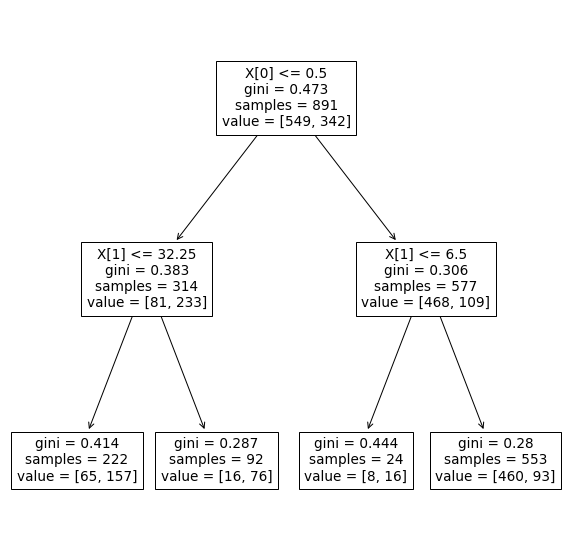

In [13]:
from sklearn.tree import plot_tree       # 匯入決策樹繪圖工具

fig, ax = plt.subplots(figsize=(10, 10)) # 創造繪圖環境

plot_tree(model, ax=ax)                  # 繪製訓練後的模型

plt.show()                               # 繪製圖表

## 模型驗證

![Overfitting & Underfitting](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Overfitting_svg.svg/600px-Overfitting_svg.svg.png)

機器學習模型在訓練資料上進行學習後可以得到三種結果：

|訓練資料|測試資料|結果|
|-|-|-|
|表現不好||無法適應（Underfitting）|
|表現良好|表現良好|任務完成|
|表現良好|表現不好|過度適應（Overfitting）|

### 無法適應（Underfitting）

解決方法包含：

- 更換模型
- 更換演算法
- 增加參數

### 過度適應（Overfitting）

解決方法包含：

- 減少參數
- 使用更多的訓練資料
- 使用驗證資料評估模型

### 驗證資料（Validation Set）

使用 `sklearn.model_selection.train_test_split` 將訓練資料集分成兩個部份：

- 訓練資料集（Training Set）
    - 模型直接訓練的資料
- 驗證資料集（Validation Set）
    - 用來驗證模型的資料
    - 驗證完畢後確認沒有問題，可以與訓練資料集**合併**後再次訓練

```python
from sklearn.model_selection import train_test_split # 匯入分離訓練資料與驗證資料的工具

(train_x_split, valid_x_split,
 train_y_split, valid_y_split) = train_test_split(   # 分離訓練資料與驗證資料
    train_x,                                         # 原始訓練資料
    train_y,                                         # 原始訓練資料標記
    test_size=0.33                                   # 分離比例
)
```

更多的驗證方法請參考 [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

### 交叉驗證（Cross Validation）

![K-fold Cross Validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

使用不同的資料訓練的結果可能不同，為了消除驗證資料的**隨機性**，通常會將驗證資料用來訓練，並把訓練資料用來驗證，此過程稱為**交叉驗證**。
可是驗證資料比起訓練資料通常會**較少**，導致模型無法適應，所以可以使用 $K$ 次交叉驗證（K-fold Cross Validation）**消除隨機性**，並將 $K$ 次的實驗結果取**平均**作為最終實驗結果。

`sklearn` 提供了 `sklearn.model_selection.KFold` 進行交叉驗證：

```python
from sklearn.model_selection import KFold          # 匯入 K 次交叉驗證工具

kf = KFold(n_splits=3)                             # 設定 K 值
kf.get_n_splits(train_x)                           # 給予資料範圍

for train_index, valid_index in kf.split(train_x): # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x[train_index]           # 產生訓練資料
    train_y_split = train_y[train_index]           # 產生訓練資料標籤
    valid_x_split = train_x[valid_index]           # 產生驗證資料
    valid_y_split = train_y[valid_index]           # 產生驗證資料標籤
```

In [14]:
# 驗證資料

from sklearn.model_selection import train_test_split # 匯入分離訓練資料與驗證資料的工具
from sklearn.tree import DecisionTreeClassifier      # 匯入決策樹模型
from sklearn.metrics import accuracy_score           # 匯入準確度計算工具

(train_x_split, valid_x_split,
 train_y_split, valid_y_split) = train_test_split(   # 分離訓練資料與驗證資料
    train_x,                                         # 原始訓練資料
    train_y,                                         # 原始訓練資料標記
    test_size=0.33,                                  # 分離比例
    random_state=1012                                # 控制隨機亂數
)

model = DecisionTreeClassifier(random_state=1012)    # 創造決策樹模型
model.fit(train_x_split, train_y_split)              # 訓練決策樹模型

train_pred_y = model.predict(train_x_split)          # 確認模型是否訓練成功
train_acc = accuracy_score(train_y_split,            # 計算訓練資料準確度
                           train_pred_y)
valid_pred_y = model.predict(valid_x_split)          # 驗證模型是否訓練成功
valid_acc = accuracy_score(valid_y_split,            # 計算驗證資料準確度
                           valid_pred_y)

print('train accuracy: {}'.format(train_acc))        # 輸出訓練準確度
print('valid accuracy: {}'.format(valid_acc))        # 輸出驗證準確度

train accuracy: 0.8271812080536913
valid accuracy: 0.7661016949152543


In [15]:
# 交叉驗證

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=3,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)


    
print((
    'average train accuracy: {}\n' +
    'min train accuracy: {}\n' +
    'max train accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list)                            # 輸出最高訓練準確度
))
print()
print((
    'average valid accuracy: {}\n' +
    'min valid accuracy: {}\n' +
    'max valid accuracy: {}').format(
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8310886644219977
min train accuracy: 0.8282828282828283
max train accuracy: 0.8367003367003367

average valid accuracy: 0.7519640852974186
min valid accuracy: 0.7272727272727273
max valid accuracy: 0.7643097643097643


## 評估方法

根據任務類型可以選擇不同的評估方法

### 數值預測

數值預測的評估方法通常都是計算**預測數值**與**真實答案**的**差距**：

|評估方法|意義|公式|
|-|-|-|
|`sklearn.metrics.mean_squared_error`|計算均方誤差（Mean Squared Error）|$$\frac{1}{n}\sum_{i=1}^n\big(f(x_i;\theta)-y_i\big)^2$$|
|`sklearn.metrics.mean_squared_log_error`|將誤差經過 $\log$ 轉換後再計算均方誤差|$$\frac{1}{n}\sum_{i=1}^n\Big(\log\big(1+f(x_i;\theta)\big)-\log\big(1+y_i\big)\Big)^2$$|
|`sklearn.metrics.mean_absolute_error`|計算平均絕對誤差（Mean Absolute Error）|$$\frac{1}{n}\sum_{i=1}^n\big\vert f(x_i;\theta)-y_i\big\vert$$|

更多數值預測的評估方法請參考 [`sklearn.model_evaluation`](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

### 類別預測

理解類別預測的評估方法需要理解**混淆矩陣（Confusion Matrix）**：

![Confusion Matrix](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Sensitivity_and_specificity.svg/700px-Sensitivity_and_specificity.svg.png)

|與標記答案是否相同\模型預測|模型預測答案為正（Positive，P）|模型預測答案為負（Negative，N）|
|-|-|-|
|與標記答案相同（True，T）|模型預測答案為正且與標記答案相同（True Positive，TP）|模型預測答案為負且與標記答案相同（True Negative，TN）|
|與標記答案不相同（False，F）|模型預測答案為正但與標記答案不相同（False Positive，FP）|模型預測答案為負但與標記答案不相同（False Negative，FN）|

而類別預測的評估方法通常都是計算**預測類別**與**真實答案是否相同**：

|評估方法|意義|公式|
|-|-|-|
|`sklearn.metrics.accuracy_score`|計算準確度（Accuracy），即預測結果與答案完全相同的比例|$$\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$|
|`sklearn.metrics.precision_score`|計算精密度（Precision），即預測答案為正的資料中正確的比例|$$\frac{\text{TP}}{\text{TP}+\text{FP}}$$|
|`sklearn.metrics.recall_score`|計算召回率（Recall），即答案為正的資料中預測正確的比例|$$\frac{\text{TP}}{\text{TP}+\text{FN}}$$|
|`sklearn.metrics.f1_score`|計算 F1 score，同時考慮 Precision 與 Recall 的分數|$$\frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision}+\text{Recall}}$$|

更多類別預測的評估方法請參考 [`sklearn.model_evaluation`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

### 視覺化

可以將模型訓練結果以視覺化的方式呈現，以下為部份範例：

|模型|方法|
|-|-|
|`sklearn.linear_model.LinearRegression`|將訓練資料 $x, y$ 與其預測的結果 $x, y'$ 以折線圖繪製|
|`sklearn.tree.DecisionTreeClassifier`|透過 `sklearn.tree.plot_tree` 畫出決策樹|

accuracy: 0.7968574635241302


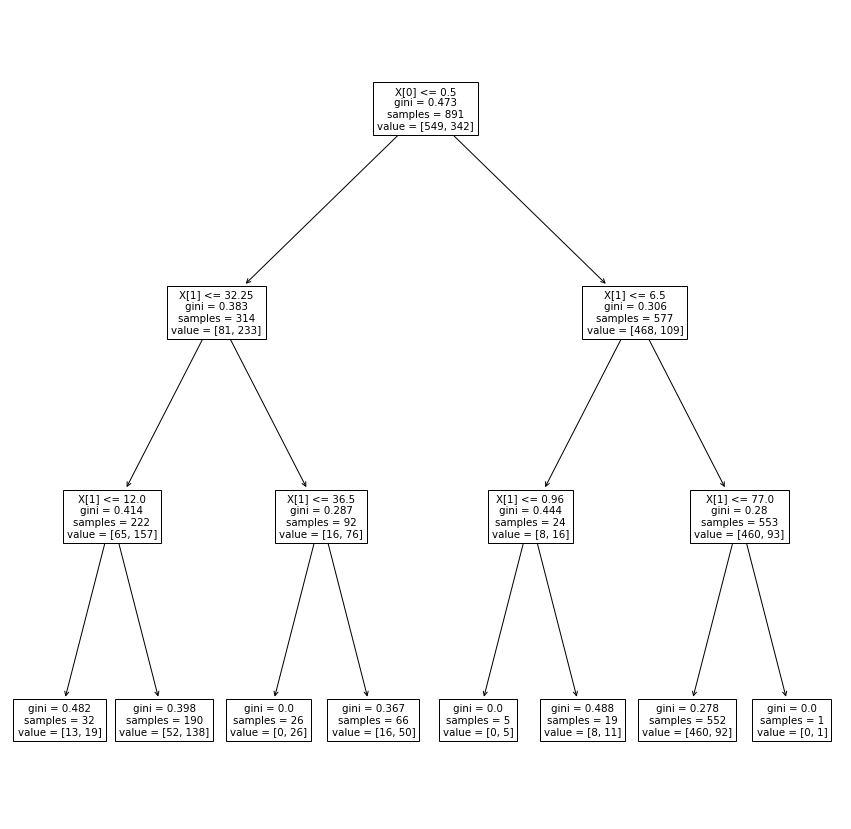

In [16]:
# 類別預測 & 視覺化

from sklearn.tree import DecisionTreeClassifier # 匯入決策樹模型
from sklearn.tree import plot_tree              # 匯入決策樹繪圖工具
from sklearn.metrics import accuracy_score      # 匯入準確度計算工具

model = DecisionTreeClassifier(                 # 創造決策樹模型
    criterion='gini',                           # 設定最佳化方法為 Gini Index
    max_depth=3,                                # 設定最大深度為 3
    max_leaf_nodes=2 ** 3)                      # 設定最多葉子個數為 8
model.fit(train_x, train_y)                     # 訓練決策樹模型

pred_y = model.predict(train_x)                 # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)           # 計算準確度

print('accuracy: {}'.format(acc))               # 輸出準確度

fig, ax = plt.subplots(figsize=(15, 15))        # 創造繪圖環境

plot_tree(model, ax=ax)                         # 繪製訓練後的模型

plt.show()                                      # 繪製圖表

## 練習

本練習使用 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) 所提供的資料，根據鐵達尼號乘客資料**預測生還者**。

點選[資料集分頁](https://www.kaggle.com/c/titanic/data)後，點擊 `Download All` 下載所有資料並解壓縮，或是只下載 `train.csv`, `test.csv`。

將下載後的資料放入 `course_material/data` 資料夾中，將 `train.csv` 與 `test.csv` 分別重新命名為 `titanic_train.csv` 與 `titanic_test.csv`。

### 練習 1：改善決策樹分類模型

請改進 `sklearn.tree.DecisionTreeClassifier` 模型分類效果，可以嘗試：

- 增加更多的輸入特徵
- 使用不同的前處理方法
- 調整超參數

### 練習 2：使用不同的模型

請使用不同的模型打敗使用 `sklearn.tree.DecisionTreeClassifier` 模型分類效果，可以嘗試課堂所提過的方法：

|模型|名稱|
|-|-|
|[`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html?highlight=metric#module-sklearn.naive_bayes)|樸素貝氏分類器（Naive Bayes Classifier）|
|[`sklearn.svm`](https://scikit-learn.org/stable/modules/classes.html?highlight=metric#module-sklearn.svm)|支援向量機（Support Vector Machines）|
|[`sklearn.neighbors`](https://scikit-learn.org/stable/modules/classes.html?highlight=metric#module-sklearn.neighbors)|近鄰演算法（Nearest Neighbors）|
|[`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html?highlight=metric#module-sklearn.ensemble)|集合學習（Ensemble）|

In [17]:
# 練習 1 解答

from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.tree import DecisionTreeClassifier   # 匯入決策樹模型
from sklearn.metrics import accuracy_score        # 匯入準確度計算工具

train_df = pd.read_csv('./data/titanic_train.csv')

train_x = train_df[['Sex', 'Age', 'Fare']]        # 取出訓練資料需要分析的資料欄位
train_y = train_df['Survived']                    # 取出訓練資料的答案

# 數值型態資料前處理

imputer = SimpleImputer(strategy='median')        # 創造 imputer 並設定填補策略
age = train_x['Age'].to_numpy().reshape(-1, 1)
imputer.fit(age)                                  # 根據資料學習需要填補的值
train_x['Age'] = imputer.transform(age)           # 填補缺失值

# 類別型態資料前處理

le = LabelEncoder()                               # 創造 Label Encoder
le.fit(train_x['Sex'])                            # 給予每個類別一個數值
train_x['Sex'] = le.transform(train_x['Sex'])     # 轉換所有類別成為數值

model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
model.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)             # 計算準確度

print('accuracy: {}'.format(acc))                 # 輸出準確度

accuracy: 0.9775533108866442


In [18]:
# 練習 2 解答

from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.svm import SVC                       # 匯入支援向量機模型
from sklearn.metrics import accuracy_score        # 匯入準確度計算工具

train_df = pd.read_csv('./data/titanic_train.csv')

train_x = train_df[['Sex', 'Age', 'Fare']]        # 取出訓練資料需要分析的資料欄位
train_y = train_df['Survived']                    # 取出訓練資料的答案

# 數值型態資料前處理

imputer = SimpleImputer(strategy='median')        # 創造 imputer 並設定填補策略
age = train_x['Age'].to_numpy().reshape(-1, 1)
imputer.fit(age)                                  # 根據資料學習需要填補的值
train_x['Age'] = imputer.transform(age)           # 填補缺失值

# 類別型態資料前處理

le = LabelEncoder()                               # 創造 Label Encoder
le.fit(train_x['Sex'])                            # 給予每個類別一個數值
train_x['Sex'] = le.transform(train_x['Sex'])     # 轉換所有類別成為數值

model = SVC(random_state=1012)                    # 創造支援向量機模型
model.fit(train_x, train_y)                       # 訓練支援向量機模型

pred_y = model.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)             # 計算準確度

print('accuracy: {}'.format(acc))                 # 輸出準確度

accuracy: 0.6812570145903479
